# Chapter 5 Questions

# Easy

## 5E1
$\mu_i = \beta_x x_i + \beta_z Z_i \\
\mu_i = \alpha + \beta_x x_i + \beta_z Z_i$

## 5E2
$diversity_i = \alpha + \beta_l lat_i + \beta_p plantd$

## 5E3
$time_i = \alpha + \beta_s size_i + \beta_f funds_i$

## 5E4
$\mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_D D_i \\
\mu_i = \alpha + \beta_B B_i + \beta_C C_i + \beta_D D_i \\
\mu_i = \alpha_A A_i + \alpha_B B_i + \alpha_C C_i + \alpha_D D_i$

# Medium

In [2]:
from scipy import stats
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

az.style.use('arviz-darkgrid')

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


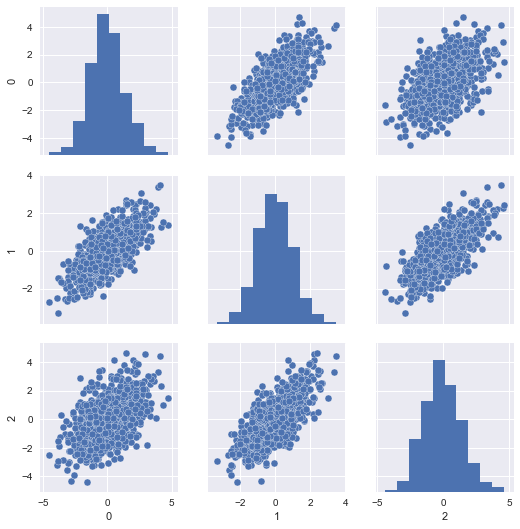

In [1]:
# 5M1
n = 1000
x_real = stats.norm.rvs(size = n)
x_spurr = stats.norm.rvs(x_real)
y = stats.norm.rvs(x_real)

df = pd.DataFrame([y, x_real, x_spurr,]).T
sns.pairplot(df);

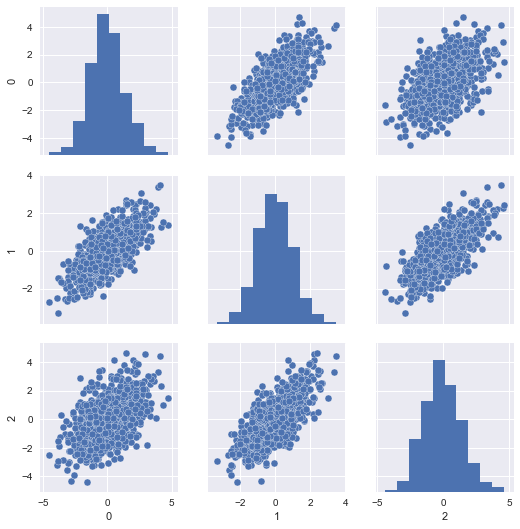

In [3]:
# 5M2
n = 500
rho = 0.2

x_real = stats.norm.rvs(n)
x_spurr = stats.norm.rvs(x_real * rho, scale = (1-rho**2)**0.5)
y = stats.norm.rvs(x_real - x_spurr) # Create  +ve relationship with x_real and -ve x_spurr

df_spurr = pd.DataFrame([y, x_real, x_spurr]).T

sns.pairplot(df);

In [8]:
# 5M3
df = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/WaffleDivorce.csv',
                sep = ';')
df['mormons'] = stats.uniform.rvs(0, 1, df.shape[0])

# Standardise predictors
df['mormons_s'] = (df['mormons'] - df['mormons'].mean())/df['mormons'].std()
df['marriage_s'] = (df['Marriage'] - df['Marriage'].mean())/df['Marriage'].std()
df['median_age_s'] = (df['MedianAgeMarriage'] - df['MedianAgeMarriage'].mean())/df['MedianAgeMarriage'].std()

with pm.Model() as m_5m3:
    a = pm.Normal('a', mu = 10, sd = 10)
    b_mor = pm.Normal('b_mor', mu = 0, sd = 1)
    b_mar = pm.Normal('b_mar', mu = 0, sd = 1)
    b_age = pm.Normal('b_age', mu = 0, sd = 1)
    mu = pm.Deterministic('mu', a + b_mor * df.mormons_s + b_mar * df.marriage_s + b_age * df.median_age_s)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
   
    divorce = pm.Normal('divorce', mu = mu, sd = sigma, observed = df.Divorce)
    trace_m5m3 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_age, b_mar, b_mor, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2376.34draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


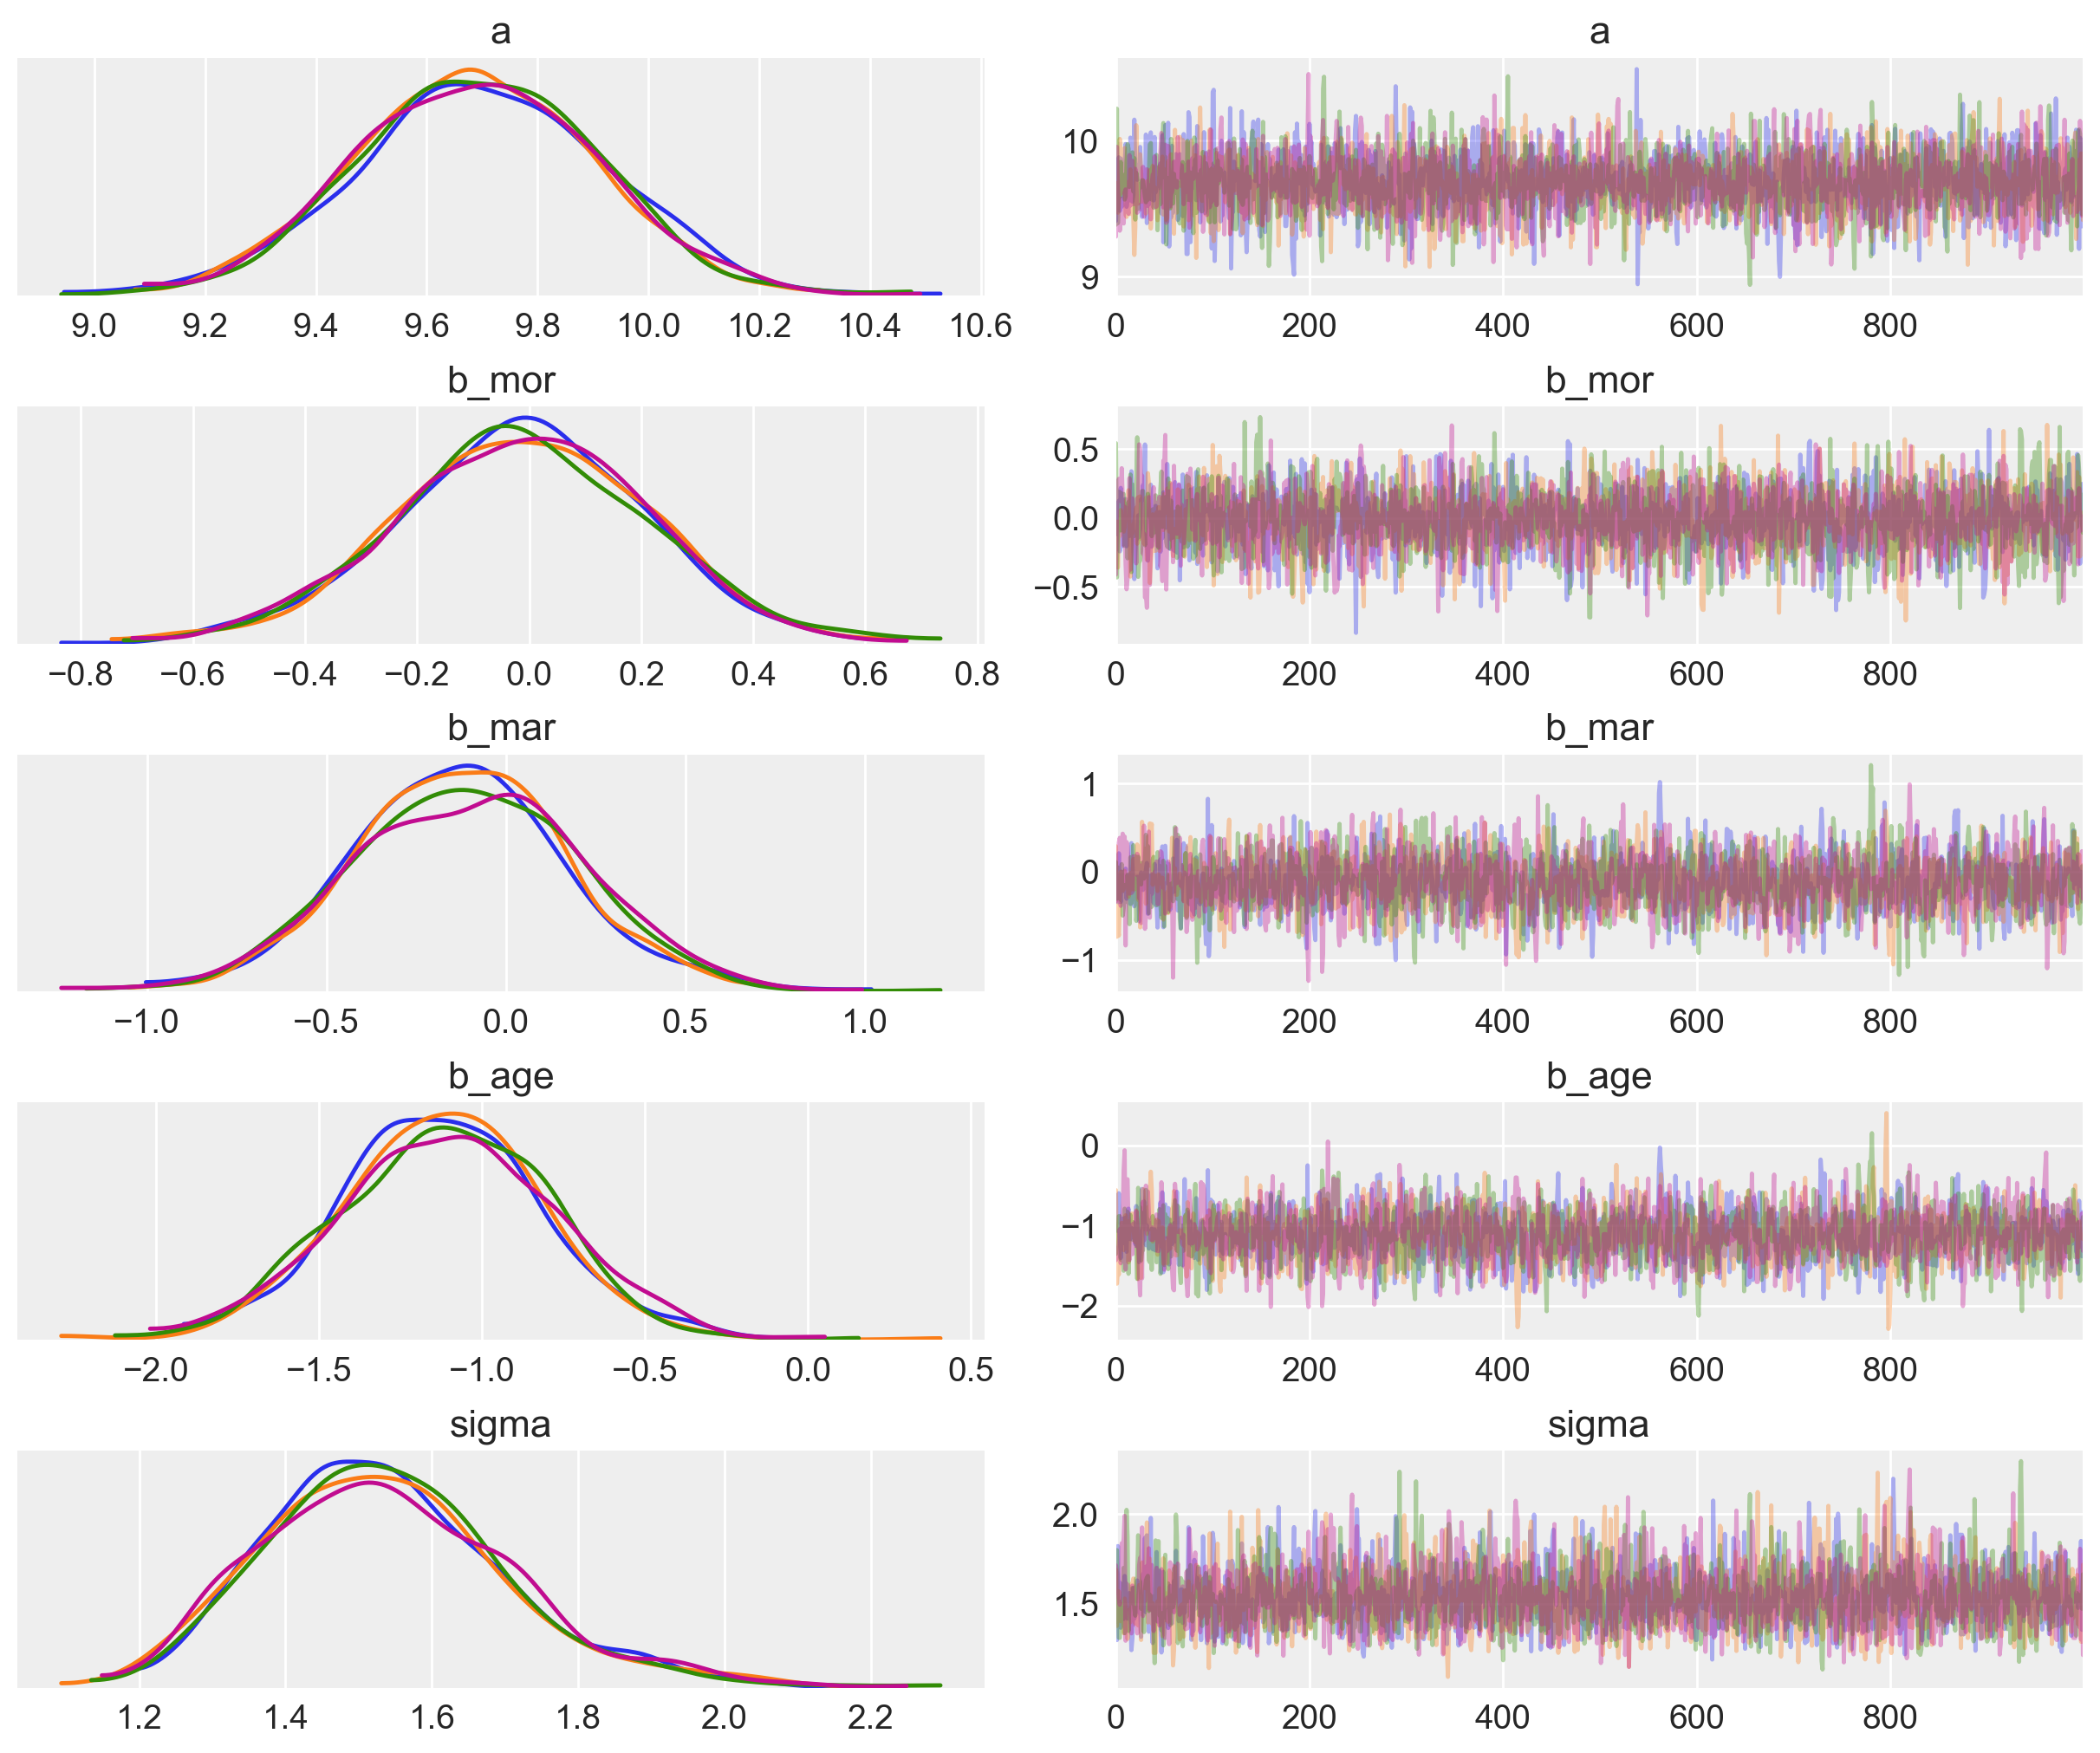

In [9]:
az.plot_trace(trace_m5m3, ['~mu']);

# Hard


In [3]:
# 5H1
df = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/foxes.csv')

In [4]:
with pm.Model() as m_5h1:
    a = pm.Normal('a', mu = 10, sd = 10)
    b_area = pm.Normal('b_area', mu = 0, sd =1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    mu = pm.Deterministic('mu', a + b_area * df.area)
    
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = df.weight)
    trace_m_5h1 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_area, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2022.14draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


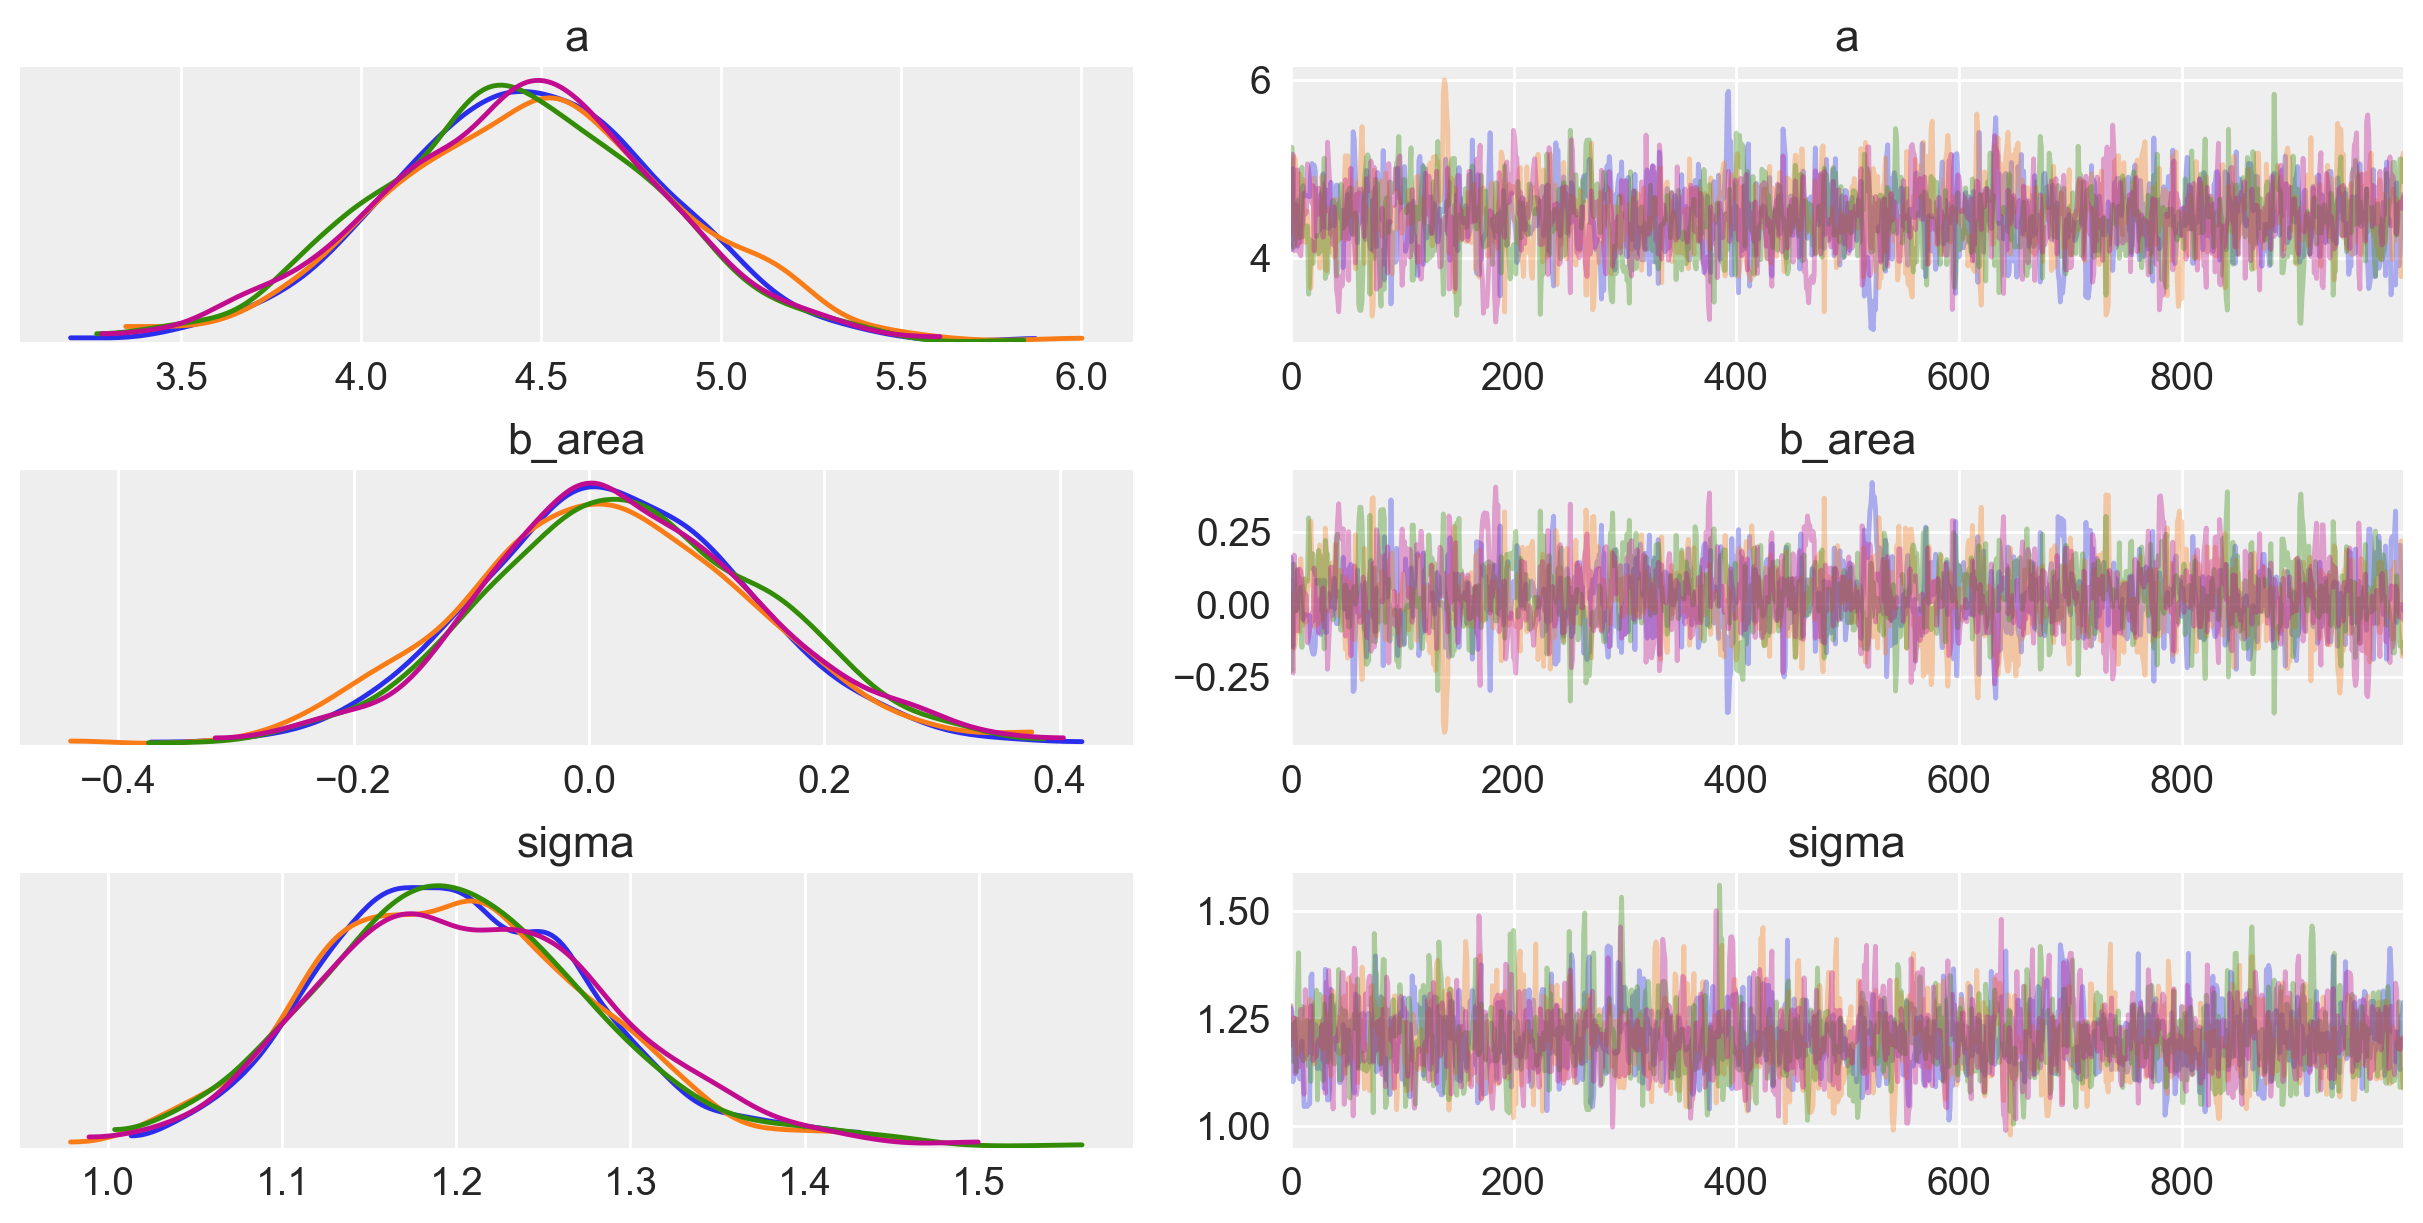

In [5]:
az.plot_trace(trace_m_5h1, ['~mu']);

In [6]:
az.summary(trace_m_5h1, ['~mu'], credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a       4.452  0.391     3.789      5.037      0.011    0.008    1255.0   
b_area  0.025  0.119    -0.158      0.221      0.003    0.002    1265.0   
sigma   1.203  0.080     1.076      1.327      0.002    0.001    2313.0   

        ess_sd  ess_bulk  ess_tail  r_hat  
a       1255.0    1258.0    1525.0    1.0  
b_area  1265.0    1271.0    1492.0    1.0  
sigma   2308.0    2307.0    1889.0    1.0

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


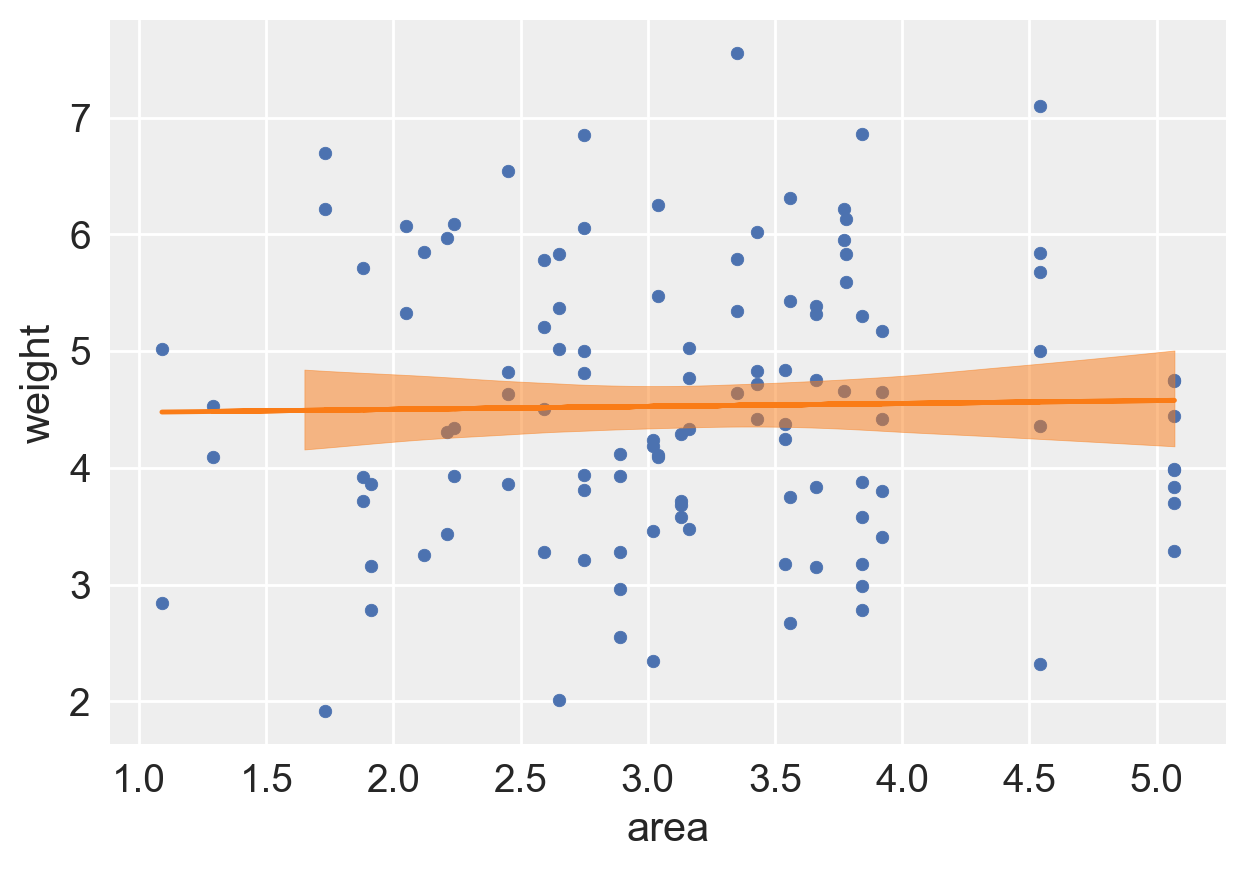

In [35]:
mu_mean_5h1 = trace_m_5h1['mu']

df.plot('area', 'weight', kind = 'scatter')
plt.plot(df.area, mu_mean_5h1.mean(0), 'C1')

az.plot_hpd(df.area, mu_mean_5h1, credible_interval = 0.89);

In [39]:
with pm.Model() as m_5h1_2:
    a = pm.Normal('a', mu = 10, sd = 10)
    b_size = pm.Normal('b_size', mu = 0, sd =1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    mu = pm.Deterministic('mu', a + b_size * df.groupsize)
    
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = df.weight)
    trace_m_5h1_2 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_area, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2151.49draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


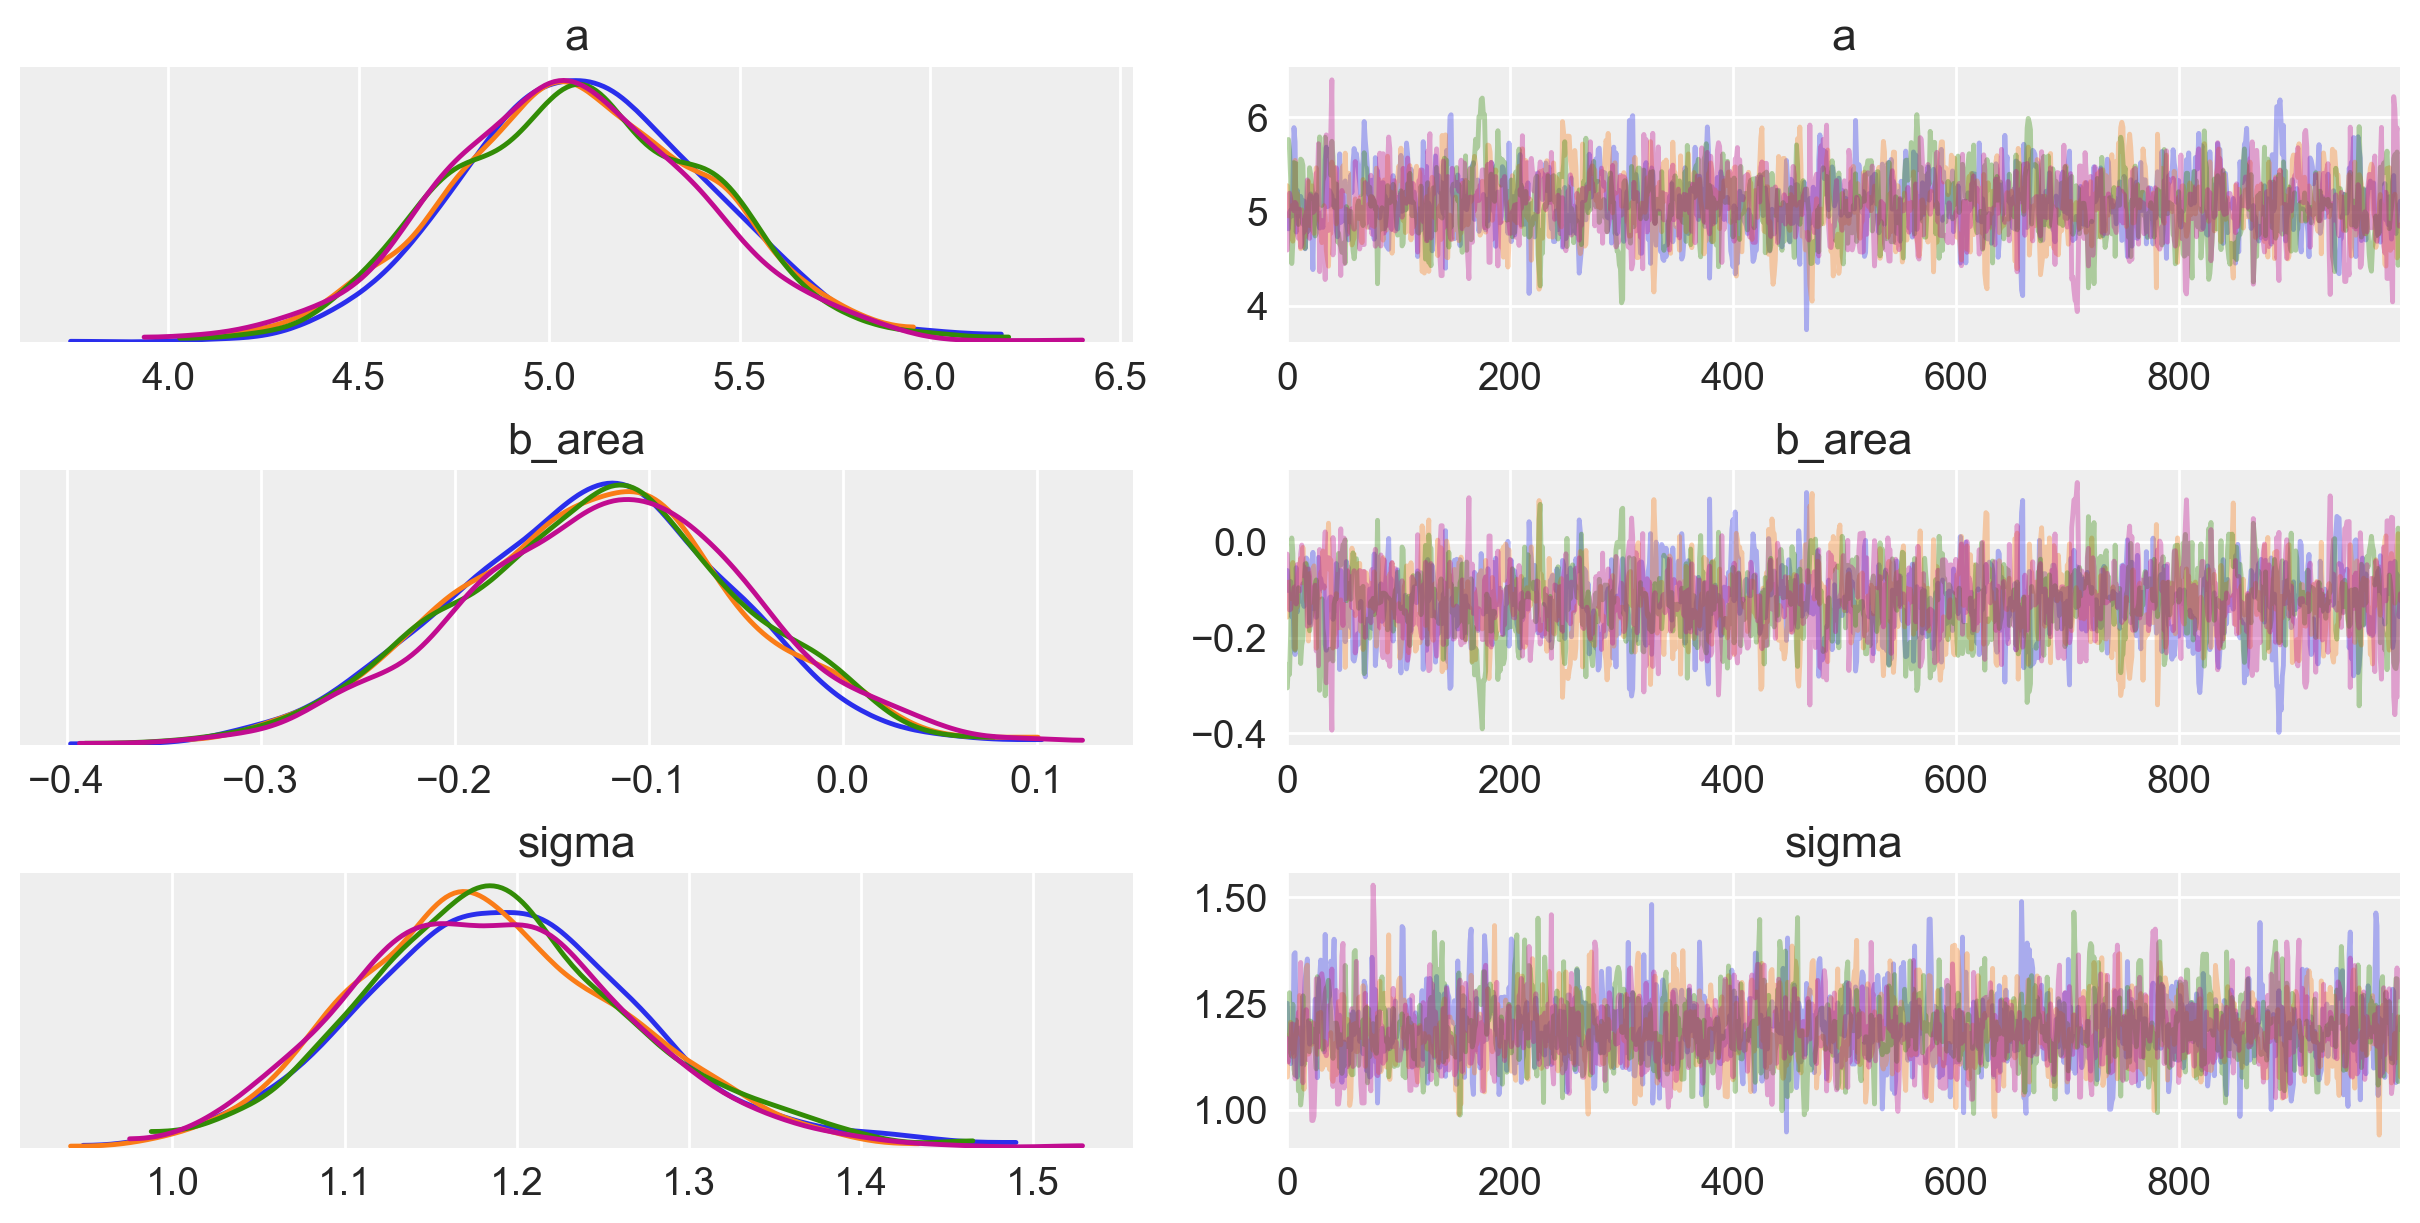

In [43]:
pm.traceplot(trace_m_5h1_2, ['~mu']);

In [132]:
az.summary(trace_m_5h1_2, ['~mu'], credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a       5.080  0.335     4.512      5.570      0.009    0.007    1275.0   
b_area -0.126  0.073    -0.246     -0.010      0.002    0.002    1231.0   
sigma   1.188  0.080     1.064      1.317      0.002    0.001    2472.0   

        ess_sd  ess_bulk  ess_tail  r_hat  
a       1263.0    1276.0    1606.0    1.0  
b_area  1132.0    1238.0    1425.0    1.0  
sigma   2461.0    2490.0    2215.0    1.0

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


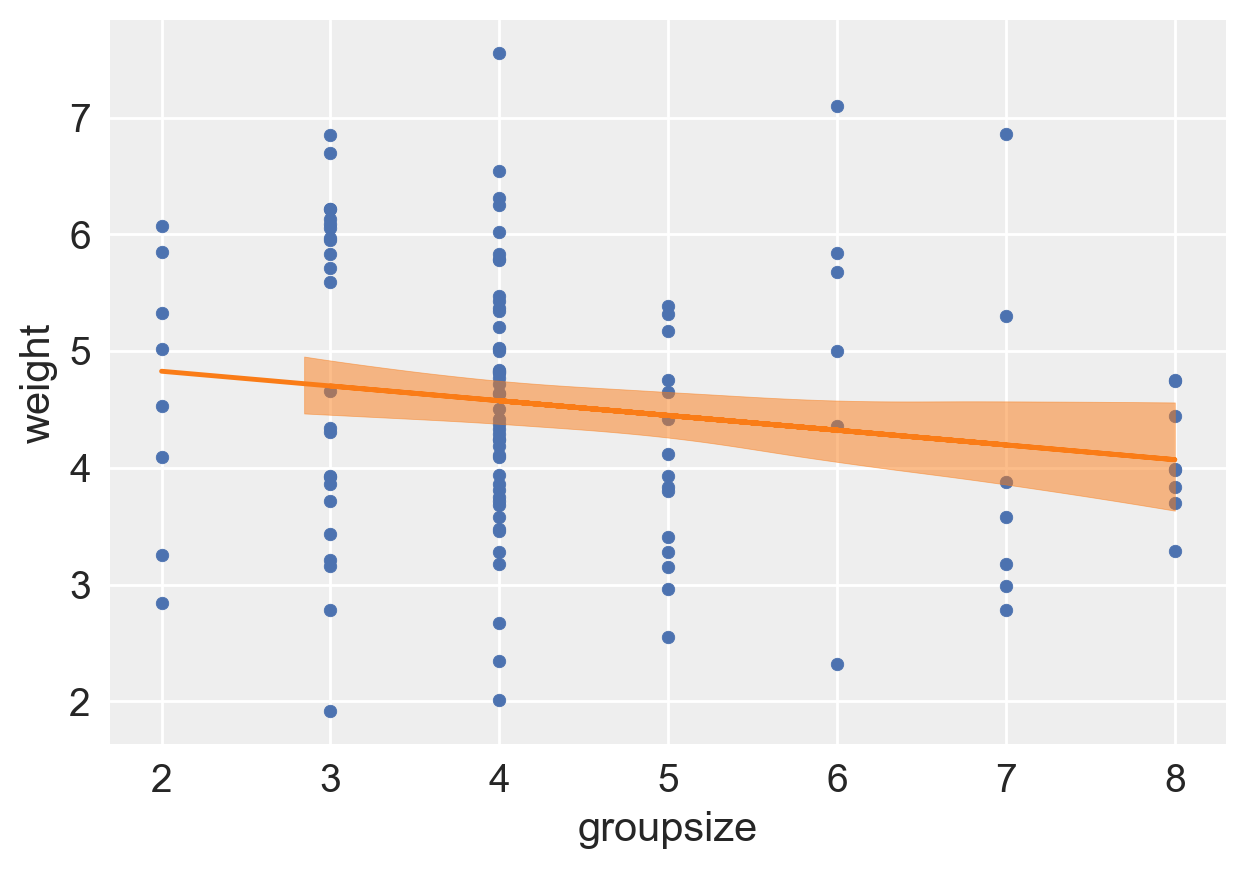

In [49]:
mu_mean_5h1_2 = trace_m_5h1_2['mu']

df.plot('groupsize', 'weight', kind = 'scatter')
plt.plot(df.groupsize, mu_mean_5h1_2.mean(0), 'C1')

az.plot_hpd(df.groupsize, mu_mean_5h1_2, credible_interval = 0.89);

Both variables in isolation seem to have a weak importance in predicting weight on their own. 

In [8]:
# 5h2
with pm.Model() as m_5h2:
    a = pm.Normal('a', mu = 10, sd = 10)
    b_area = pm.Normal('b_area', mu = 0, sd =1)
    b_size = pm.Normal('b_size', mu = 0, sd =1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    mu = pm.Deterministic('mu', a + b_area * df.area + b_size * df.groupsize)
    
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = df.weight)
    trace_m_5h2 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_size, b_area, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:08<00:00, 997.22draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.8810127577427874, but should be close to 0.8. Try to 

In [10]:
az.summary(trace_m_5h2, ['~mu'], credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a       4.476  0.387     3.857      5.075      0.008    0.006    2368.0   
b_area  0.586  0.203     0.245      0.889      0.005    0.003    1874.0   
b_size -0.414  0.121    -0.616     -0.231      0.003    0.002    2010.0   
sigma   1.147  0.075     1.022      1.259      0.002    0.001    2463.0   

        ess_sd  ess_bulk  ess_tail  r_hat  
a       2353.0    2370.0    2203.0    1.0  
b_area  1748.0    1887.0    1887.0    1.0  
b_size  1900.0    2013.0    1986.0    1.0  
sigma   2463.0    2442.0    2475.0    1.0

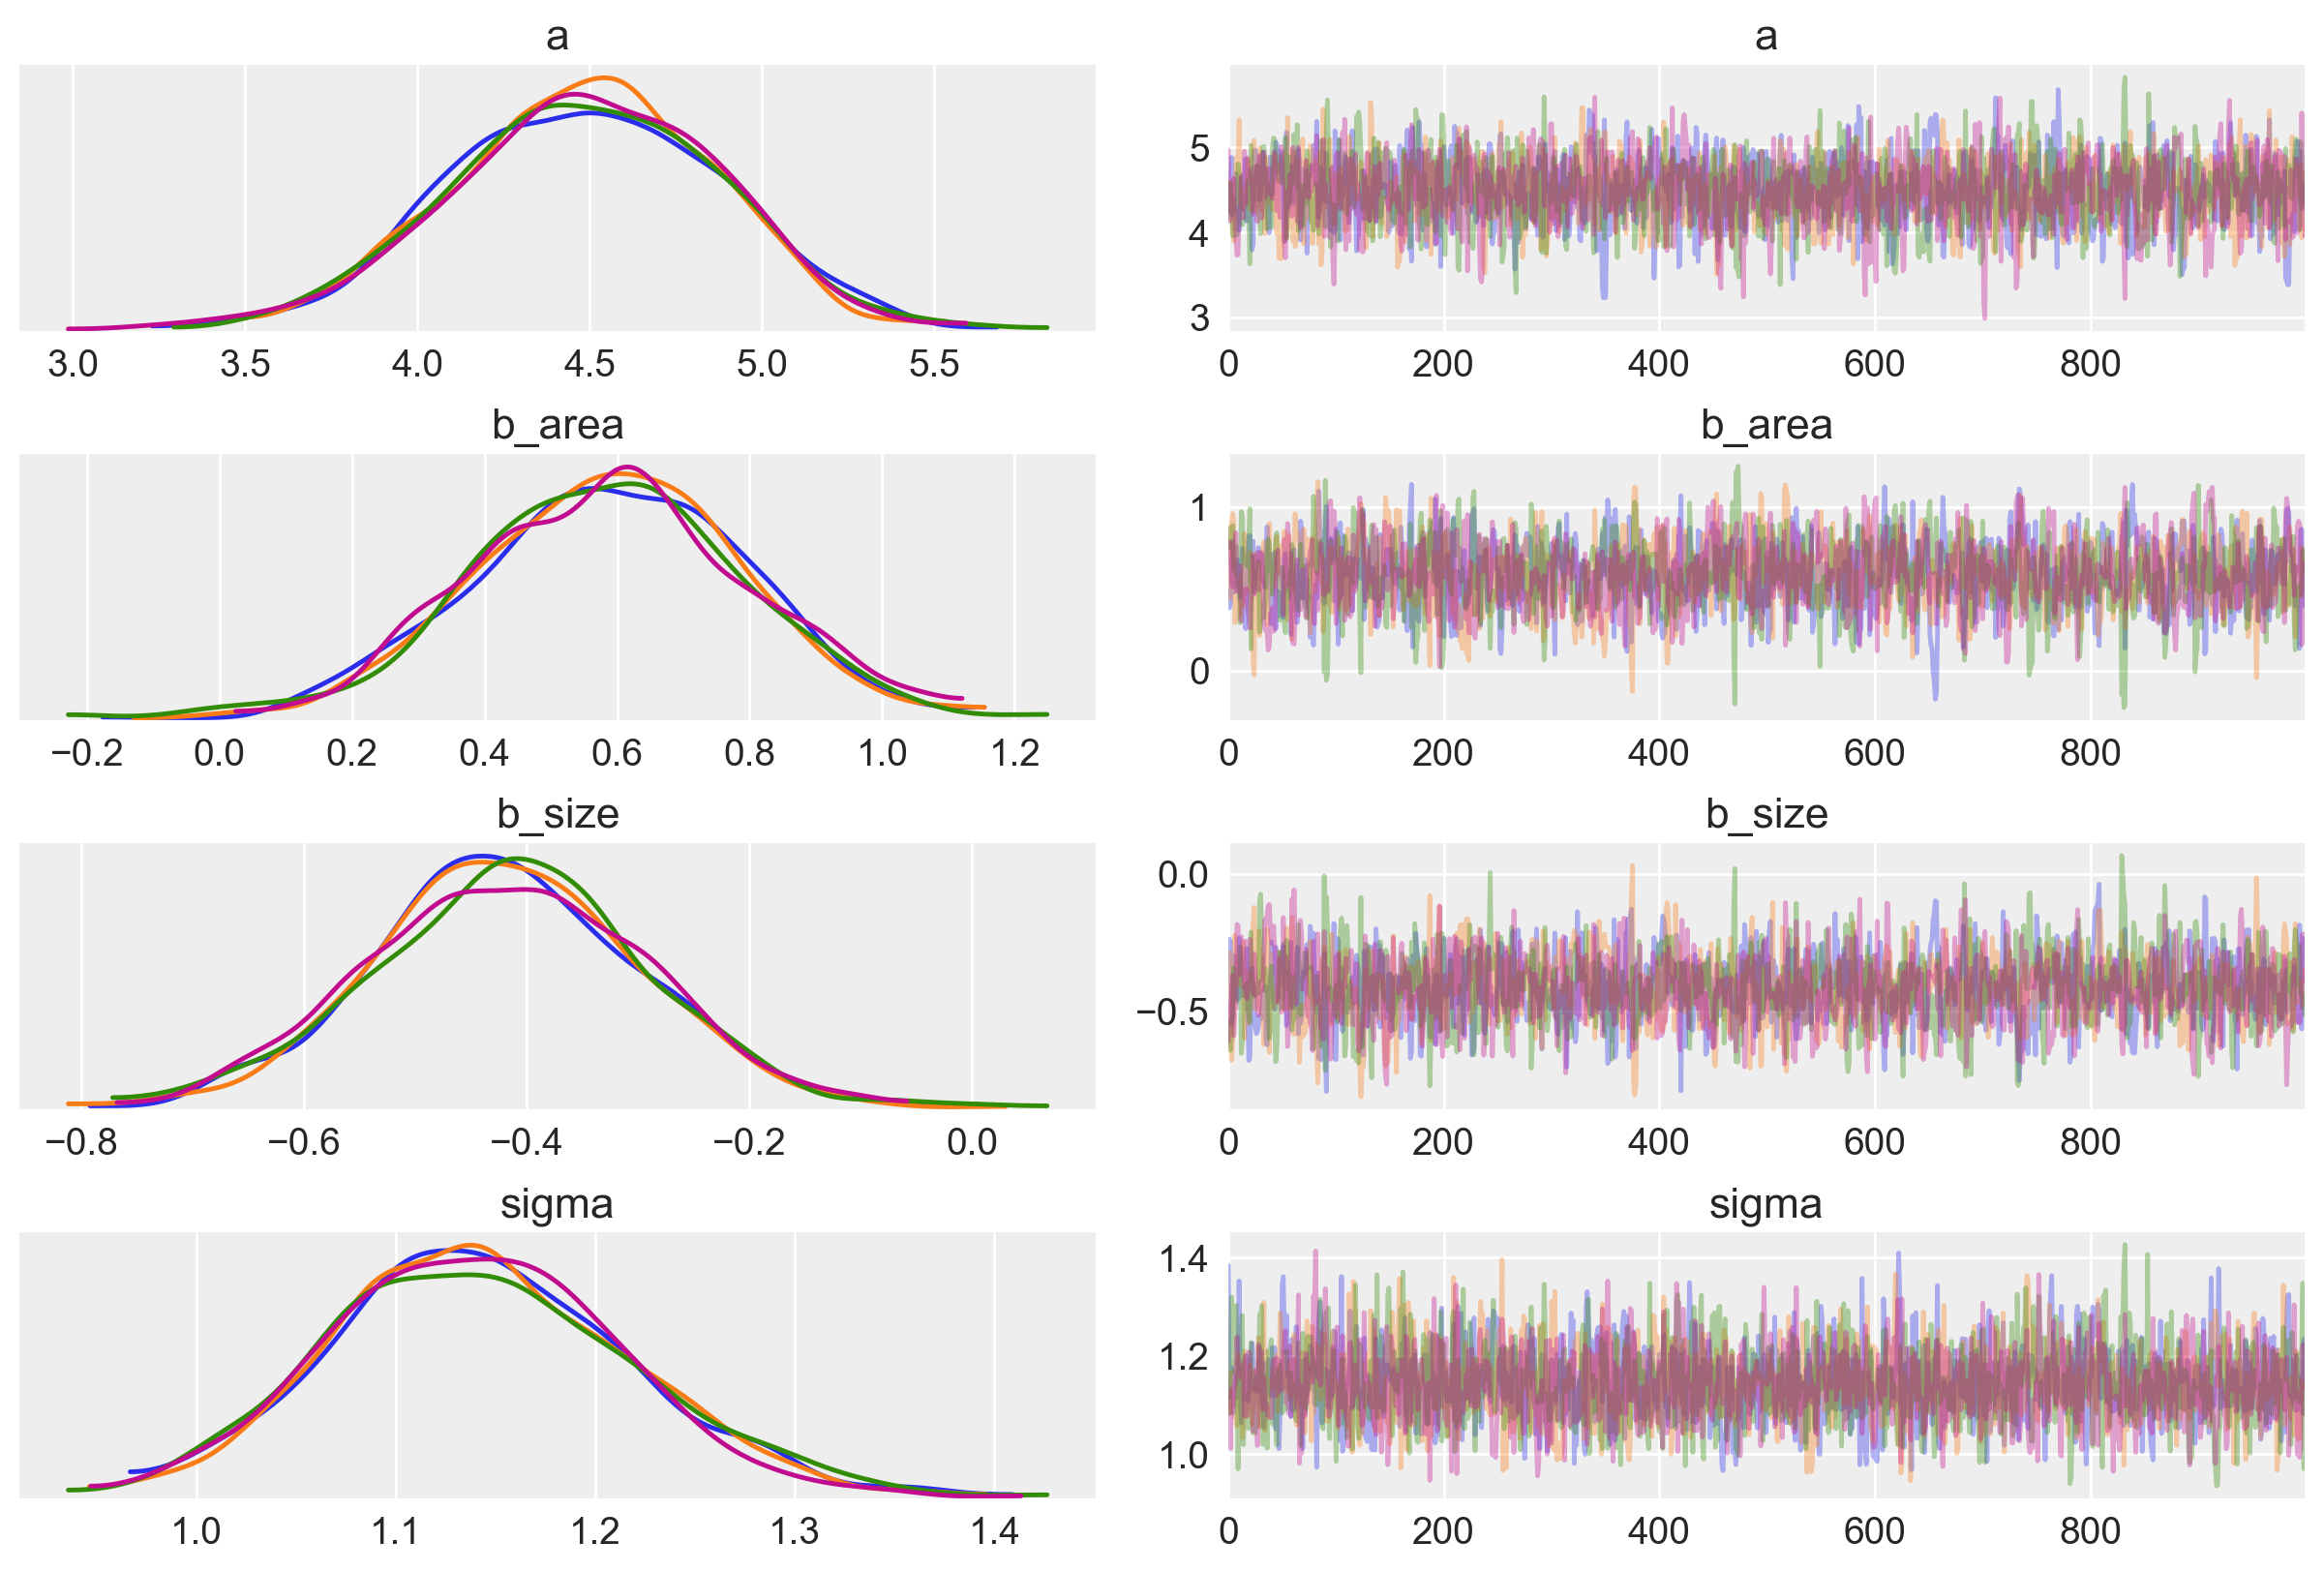

In [61]:
pm.traceplot(trace_m_5h2, ['~mu']);

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


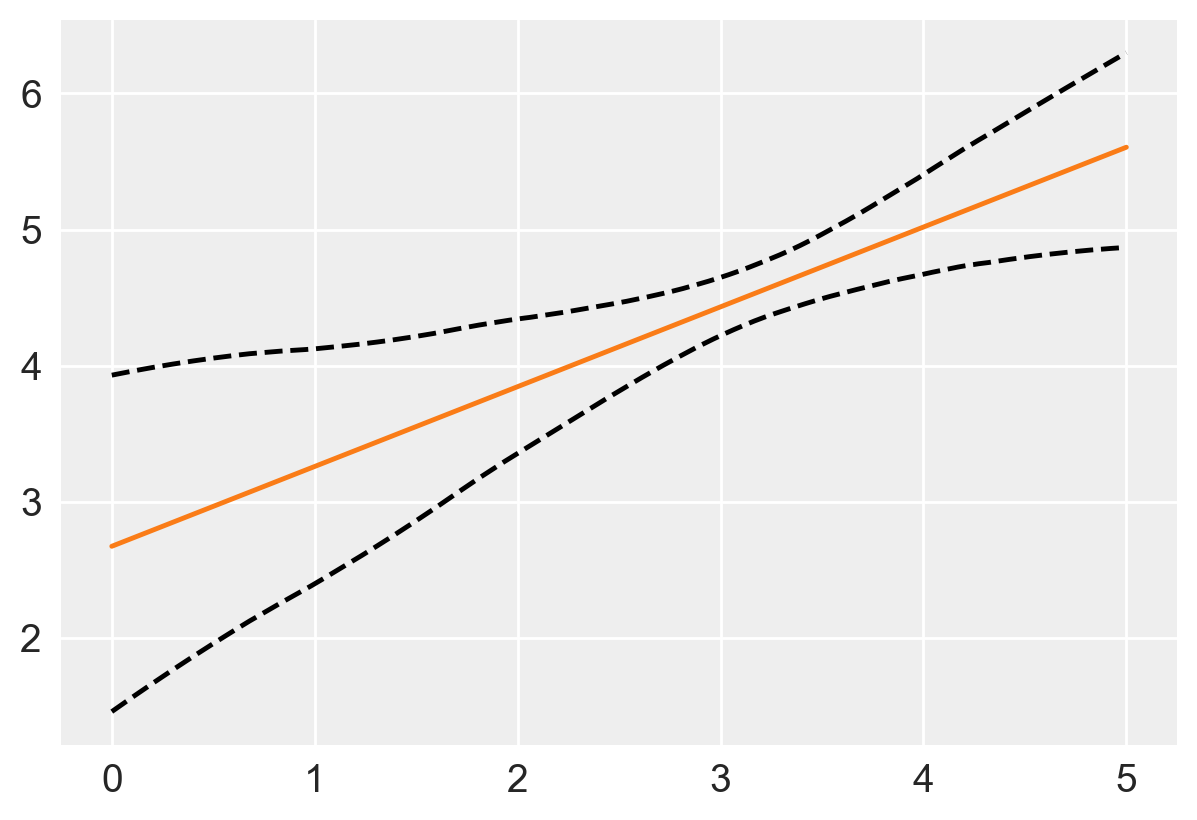

In [120]:
# Counterfactual plot for area
seq = np.linspace(0, 5, 200)
mu_mean_5h2 = trace_m_5h2['a'] + trace_m_5h2['b_size'] * df.groupsize.mean() + trace_m_5h2['b_area'] * seq[:,None]

plt.plot(seq, mu_mean_5h2.mean(1), 'C1')
az.plot_hpd(seq, mu_mean_5h2.T,
           fill_kwargs={'alpha': 0},
            plot_kwargs={'alpha': 1, 'color':'k', 'ls':'--'})

#az.plot_hpd(df.area, mu_mean_5h2, credible_interval = 0.89);

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


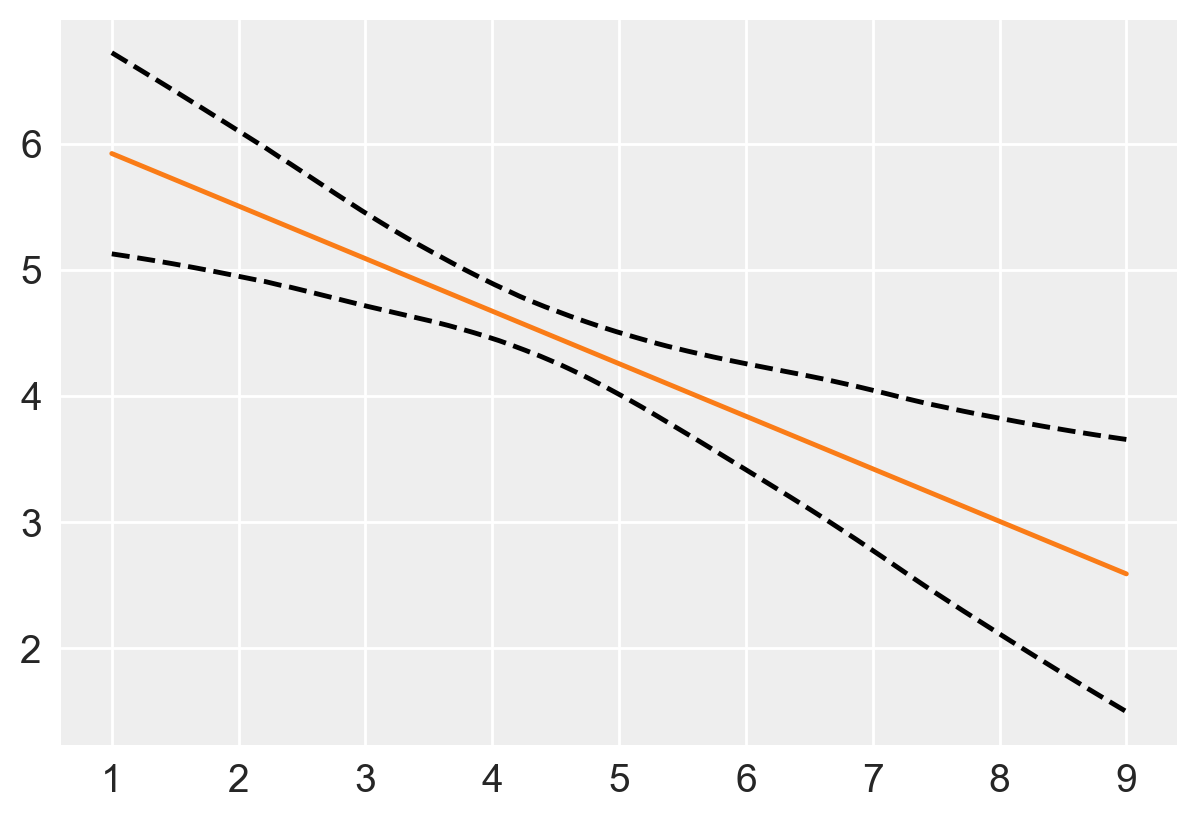

In [119]:
# Counterfactual plot for size
seq = np.linspace(1, 9, 200)
mu_mean_5h2 = trace_m_5h2['a'] + trace_m_5h2['b_size'] * seq[:,None] + trace_m_5h2['b_area'] * df.area.mean()

plt.plot(seq, mu_mean_5h2.mean(1), 'C1')
az.plot_hpd(seq, mu_mean_5h2.T,
           fill_kwargs={'alpha': 0},
            plot_kwargs={'alpha': 1, 'color':'k', 'ls':'--'})

#az.plot_hpd(df.area, mu_mean_5h2, credible_interval = 0.89);

In [122]:
# 5H3
with pm.Model() as m_5h3_1:
    a = pm.Normal('a', mu = 10 , sd = 10)
    b_f = pm.Normal('b_f', mu = 0, sd = 1)
    b_size = pm.Normal('b_size', mu = 0, sd = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    mu = pm.Deterministic('mu', a + b_size * df.groupsize + b_f * df.avgfood)
    
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = df.weight)
    trace_5h3_1 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_size, b_f, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:07<00:00, 1012.82draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.8863129962233312, but should be close to 0.8. Try to in

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133396048>,
      dtype=object)

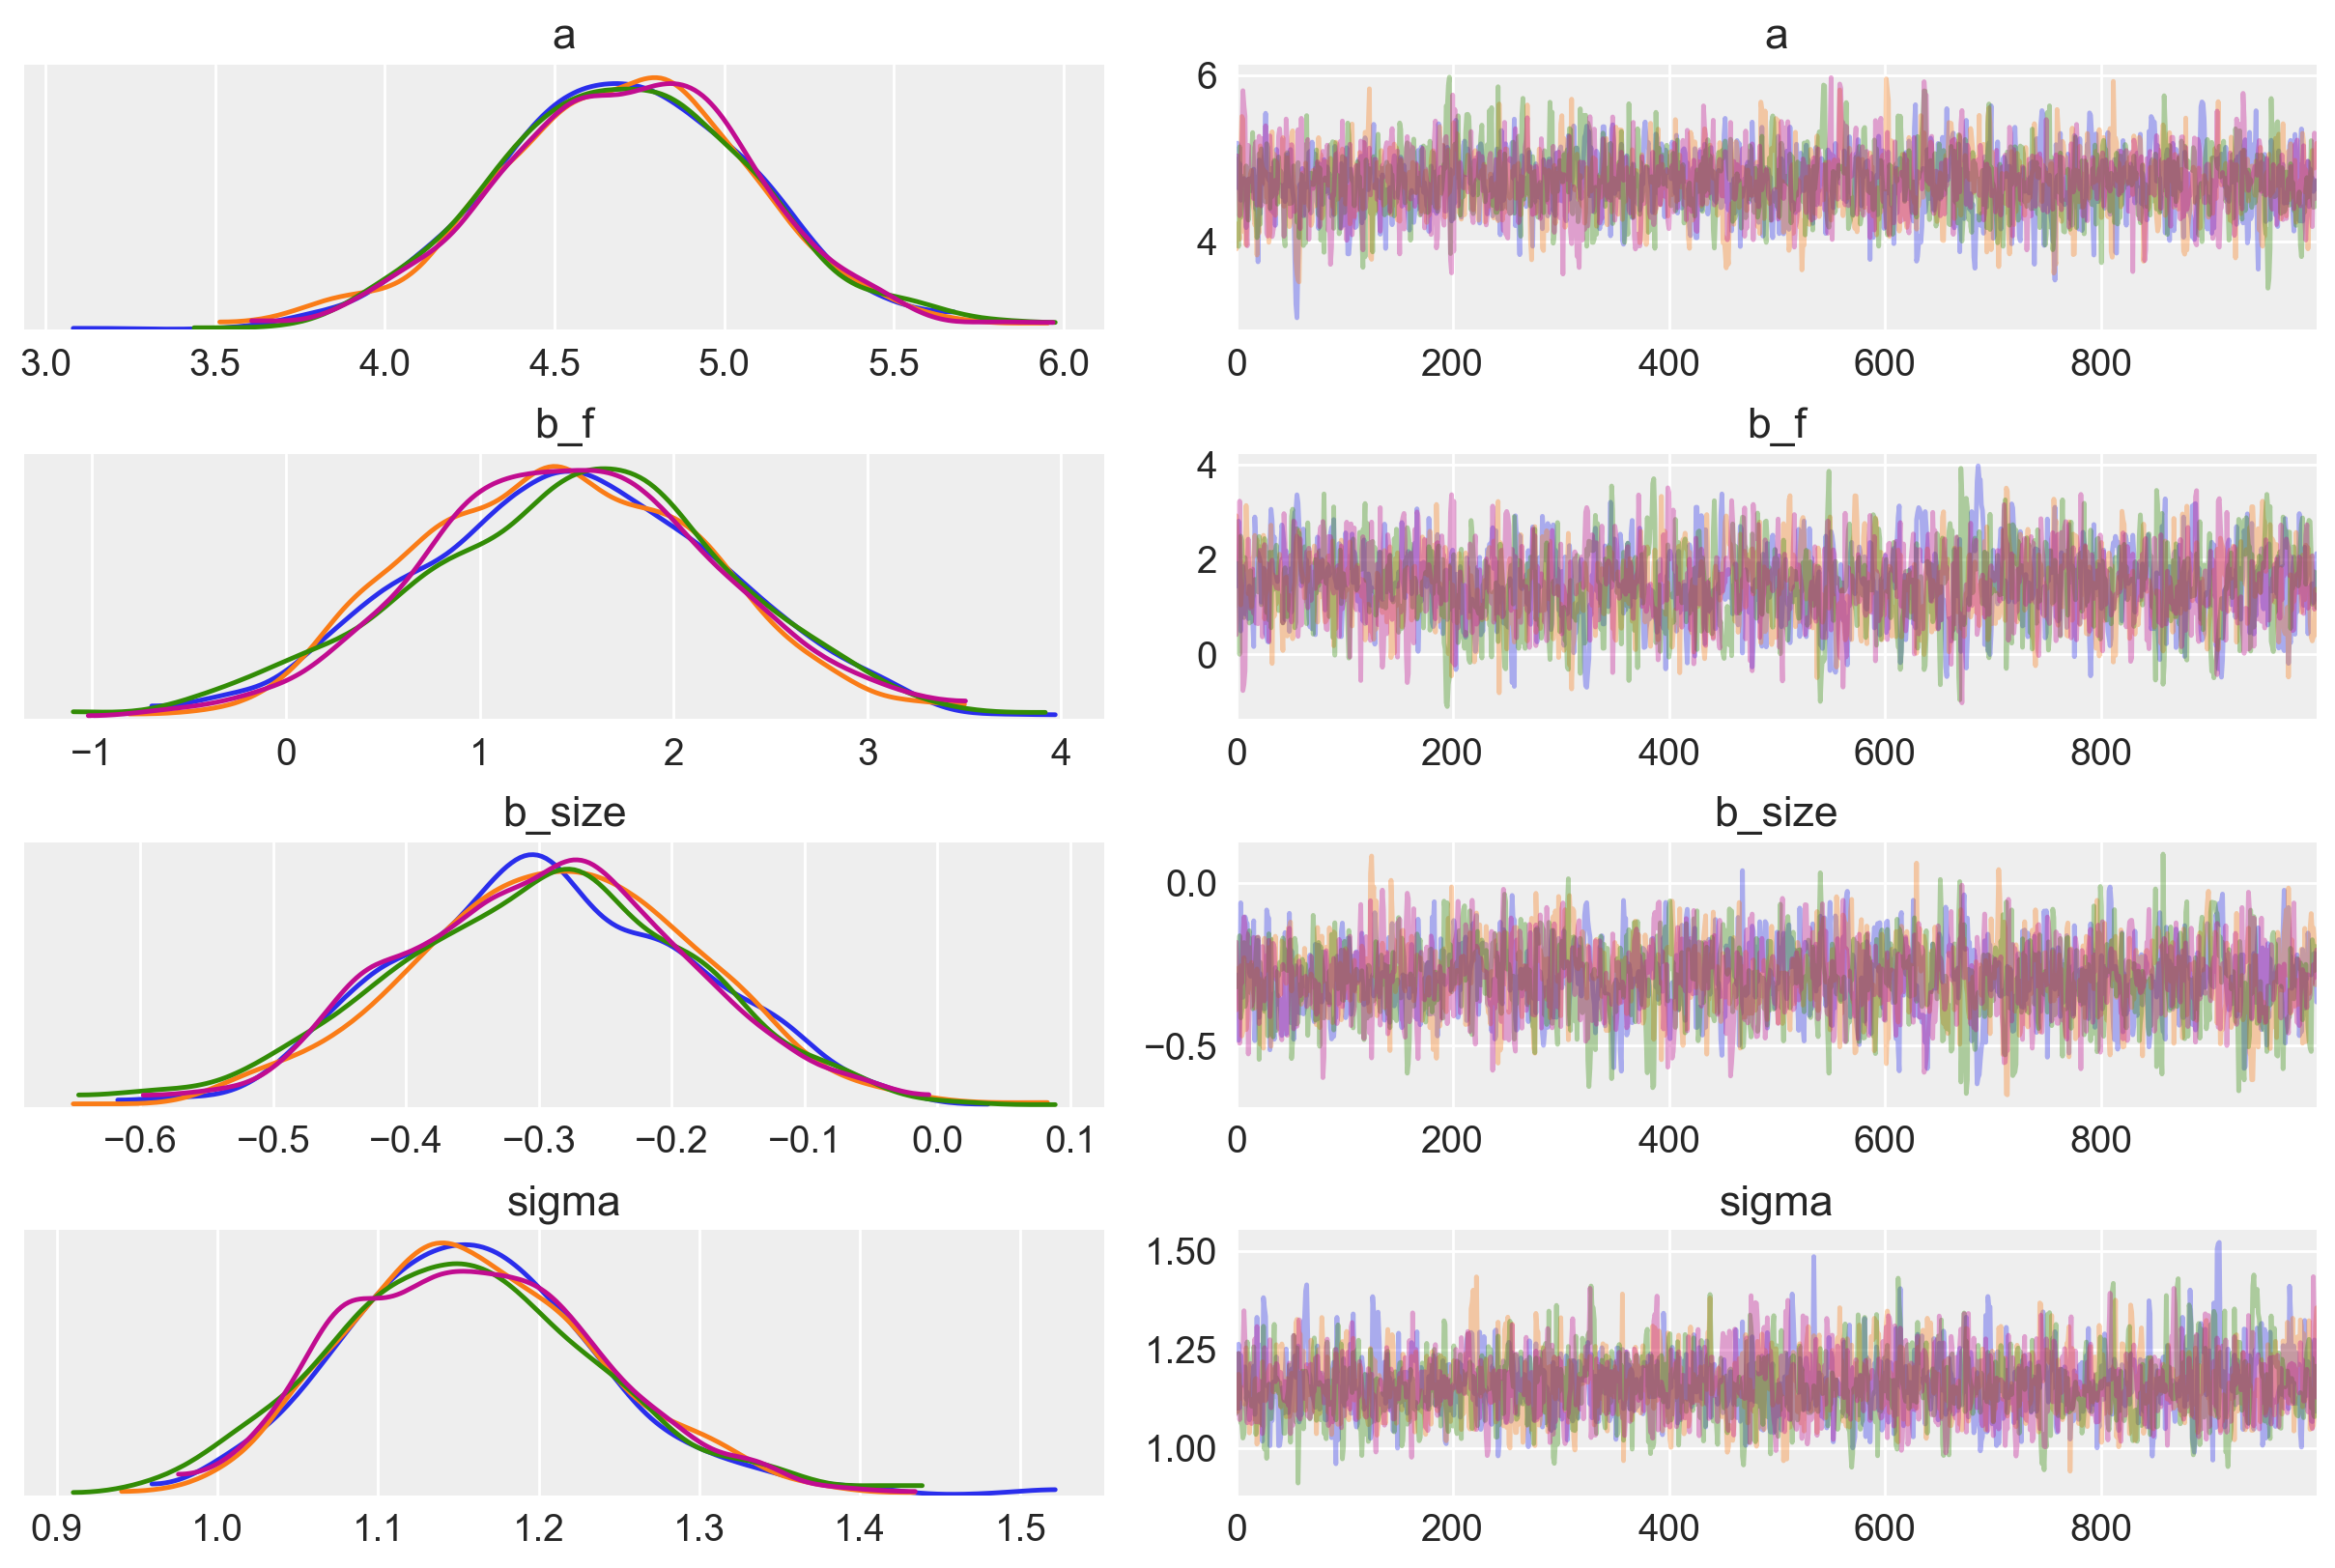

In [123]:
pm.traceplot(trace_5h3_1, ['~mu']);

In [124]:
az.summary(trace_5h3_1, ['~mu'], credible_interval = 0.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a       4.707  0.380     4.077      5.276      0.008    0.006    2273.0   
b_f     1.458  0.779     0.270      2.760      0.020    0.014    1548.0   
b_size -0.293  0.110    -0.468     -0.118      0.003    0.002    1749.0   
sigma   1.159  0.081     1.034      1.289      0.002    0.001    2517.0   

        ess_sd  ess_bulk  ess_tail  r_hat  
a       2273.0    2283.0    2182.0    1.0  
b_f     1535.0    1548.0    2091.0    1.0  
b_size  1689.0    1756.0    2036.0    1.0  
sigma   2470.0    2560.0    1980.0    1.0

In [125]:
with pm.Model() as m_5h3_2:
    a = pm.Normal('a', mu = 10 , sd = 10)
    b_f = pm.Normal('b_f', mu = 0, sd = 1)
    b_size = pm.Normal('b_size', mu = 0, sd = 1)
    b_a = pm.Normal('b_a', mu = 0, sd = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    mu = pm.Deterministic('mu', a + b_size * df.groupsize + b_f * df.avgfood + b_a * df.area)
    
    weight = pm.Normal('weight', mu = mu, sd = sigma, observed = df.weight)
    trace_5h3_2 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_a, b_size, b_f, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:11<00:00, 712.48draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1398a1f98>,
      dtype=object)

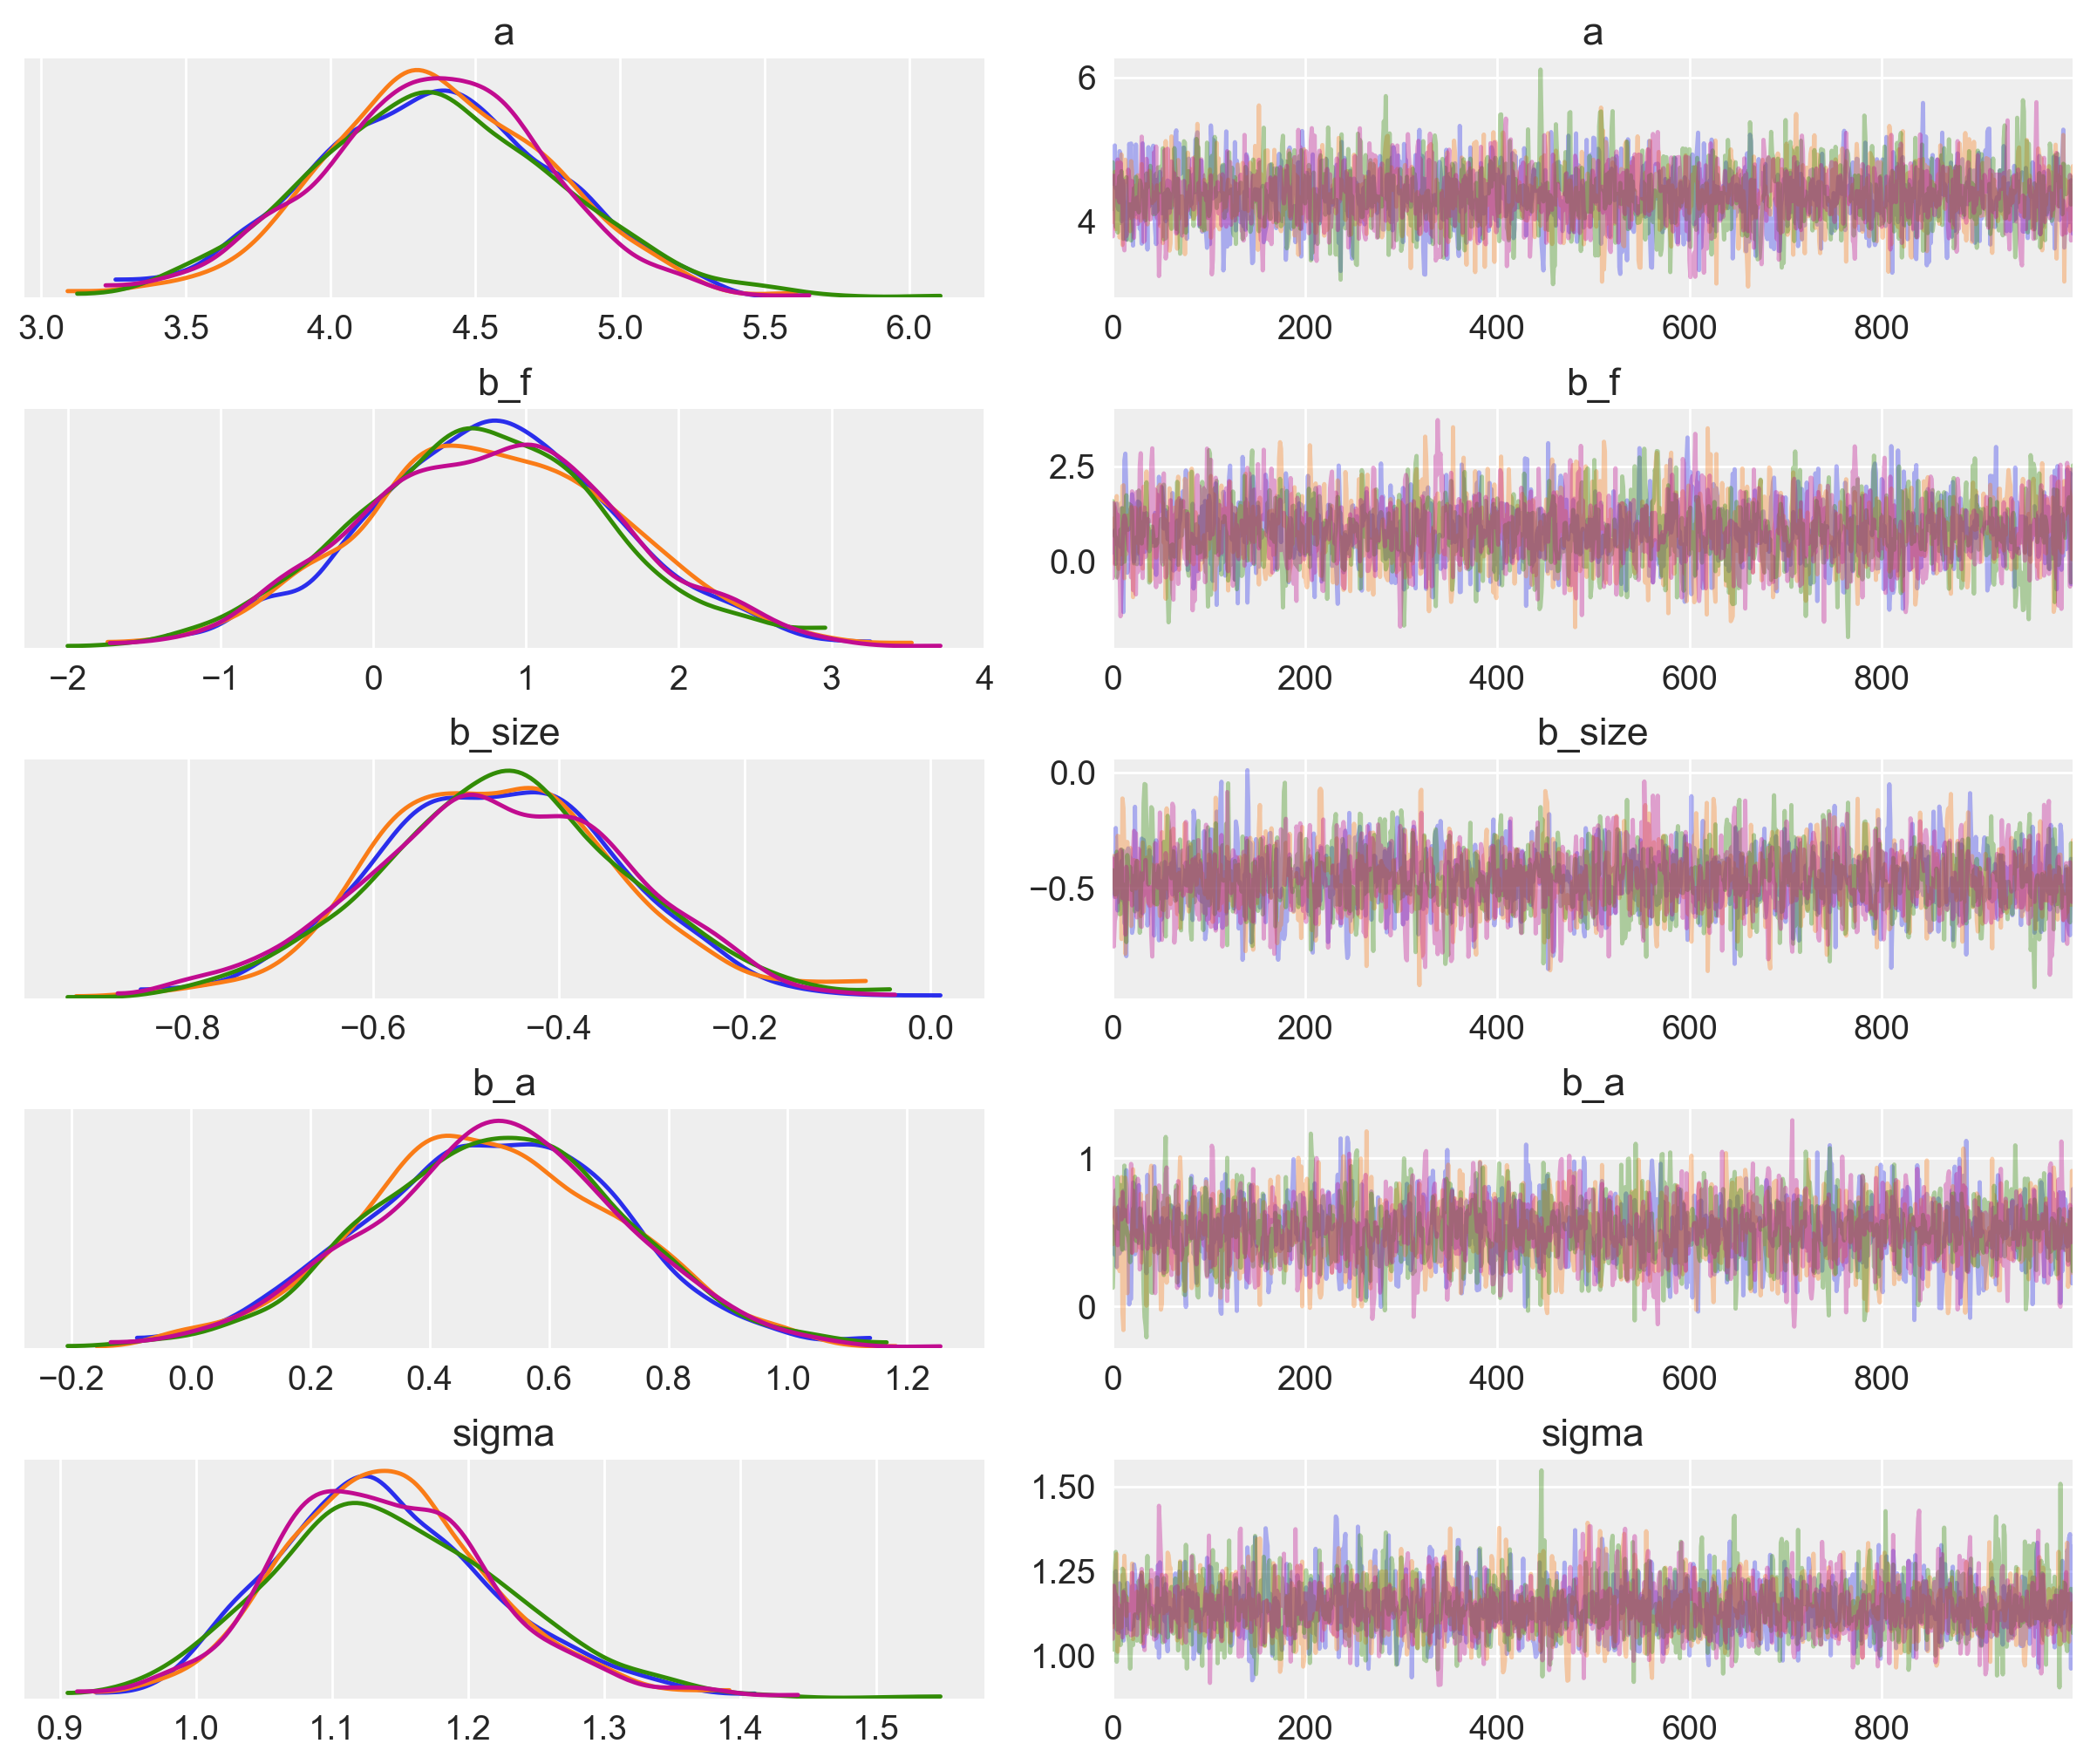

In [128]:
pm.traceplot(trace_5h3_2, ['~mu']);

In [129]:
# Multicollinearity between food and area most likely driving higher sd and weaker inference
az.summary(trace_5h3_2, ['~mu'], credible_interval = 0.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a       4.357  0.407     3.694      4.993      0.007    0.005    3164.0   
b_f     0.772  0.841    -0.723      1.996      0.017    0.013    2557.0   
b_size -0.464  0.135    -0.668     -0.242      0.003    0.002    2669.0   
b_a     0.508  0.213     0.180      0.856      0.004    0.003    2844.0   
sigma   1.141  0.081     1.021      1.277      0.001    0.001    3279.0   

        ess_sd  ess_bulk  ess_tail  r_hat  
a       3164.0    3165.0    2223.0    1.0  
b_f     2085.0    2566.0    2070.0    1.0  
b_size  2666.0    2672.0    2292.0    1.0  
b_a     2823.0    2842.0    2548.0    1.0  
sigma   3236.0    3319.0    2443.0    1.0